In [35]:
import numpy as np
import cv2
import os
import matplotlib.pylab as plt
import pandas as pd
import fracture

#csv파일 형식 바꾸기!

"""setting values"""
path = 'E:\experiment data\concerete/0.1mmsec_UVoff_600N_phone'
path_save= 'E:\experiment data\concerete/0.1mmsec_UVoff_600N_phone'
tension_section = 18
gauge_length = 20
time_proportion = 6
volt_startframe = 110

#part2 , location must be x1<x2, y1<y2

slice_x1 = 1133
slice_x2 = 1327
slice_y1 = 514
slice_y2 = 732

file_list = os.listdir(path)
count = 0
result = []

for file in file_list:
    if file.endswith(".jpg"):
        im = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)/255
        im_calculate = np.array(im)
        img_box = im_calculate[slice_y1:slice_y2, slice_x1:slice_x2]
        ave = np.average(img_box)
        result = np.append(result, [ave])
ml_avg = result
# tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))
# time, strain, stress = tension_data[:, 0]/60, tension_data[:, 3], tension_data[:, 4]*3000

# print(np.shape(ml_avg),np.shape(time))

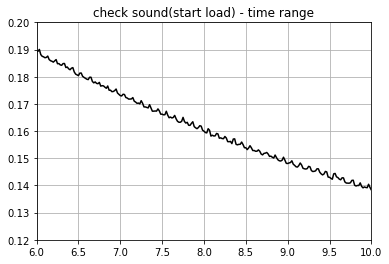

In [47]:
plt.plot(np.arange(0,np.shape(ml_avg)[0])/60, ml_avg, c='black')
plt.xlim(6,10)
plt.ylim(0.12,0.2)
plt.grid()
plt.title('check sound(start load) - time range')
plt.savefig(path+'./abc.png', dpi=300)

In [ ]:
#graph part
#############qp
fig, ax = plt.subplots()
ax.set_title('0.1mmsec_UVoff_600N_phone')
ax1 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('stress')
ax1.set_ylabel('ml')
ax.set_xlim(32,35.5)
ax1.set_ylim(0.01, 0.016)
# ax1.set_ylim(-0.01, 0.2)
# ax.set_ylim(-100,900)
line1 = ax.plot(time, stress, color='b', label="Stress")
line2 = ax1.plot(time, result, color='r', label="ML 0 to 1 ")
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)
ax.grid()
fig.savefig(path_save+'/0.1mmsec_UVoff_600N_phone.png', dpi = 300)